#Downloading the Dataset

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kairavnandi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


100%|██████████| 6.18k/6.18k [00:00<00:00, 5.56MB/s]

#Importing Required Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score as acc, classification_report as cr, confusion_matrix as cm
from sklearn.tree import plot_tree as pt

#Converting the Dataset into a Dataframe to perform operations

In [41]:
df = pd.read_csv("/content/heart-disease-dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [43]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#Splitting Data into Training and Testing Sets

In [44]:
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

#Training a Decision Tree Classifier and Visualising the Tree

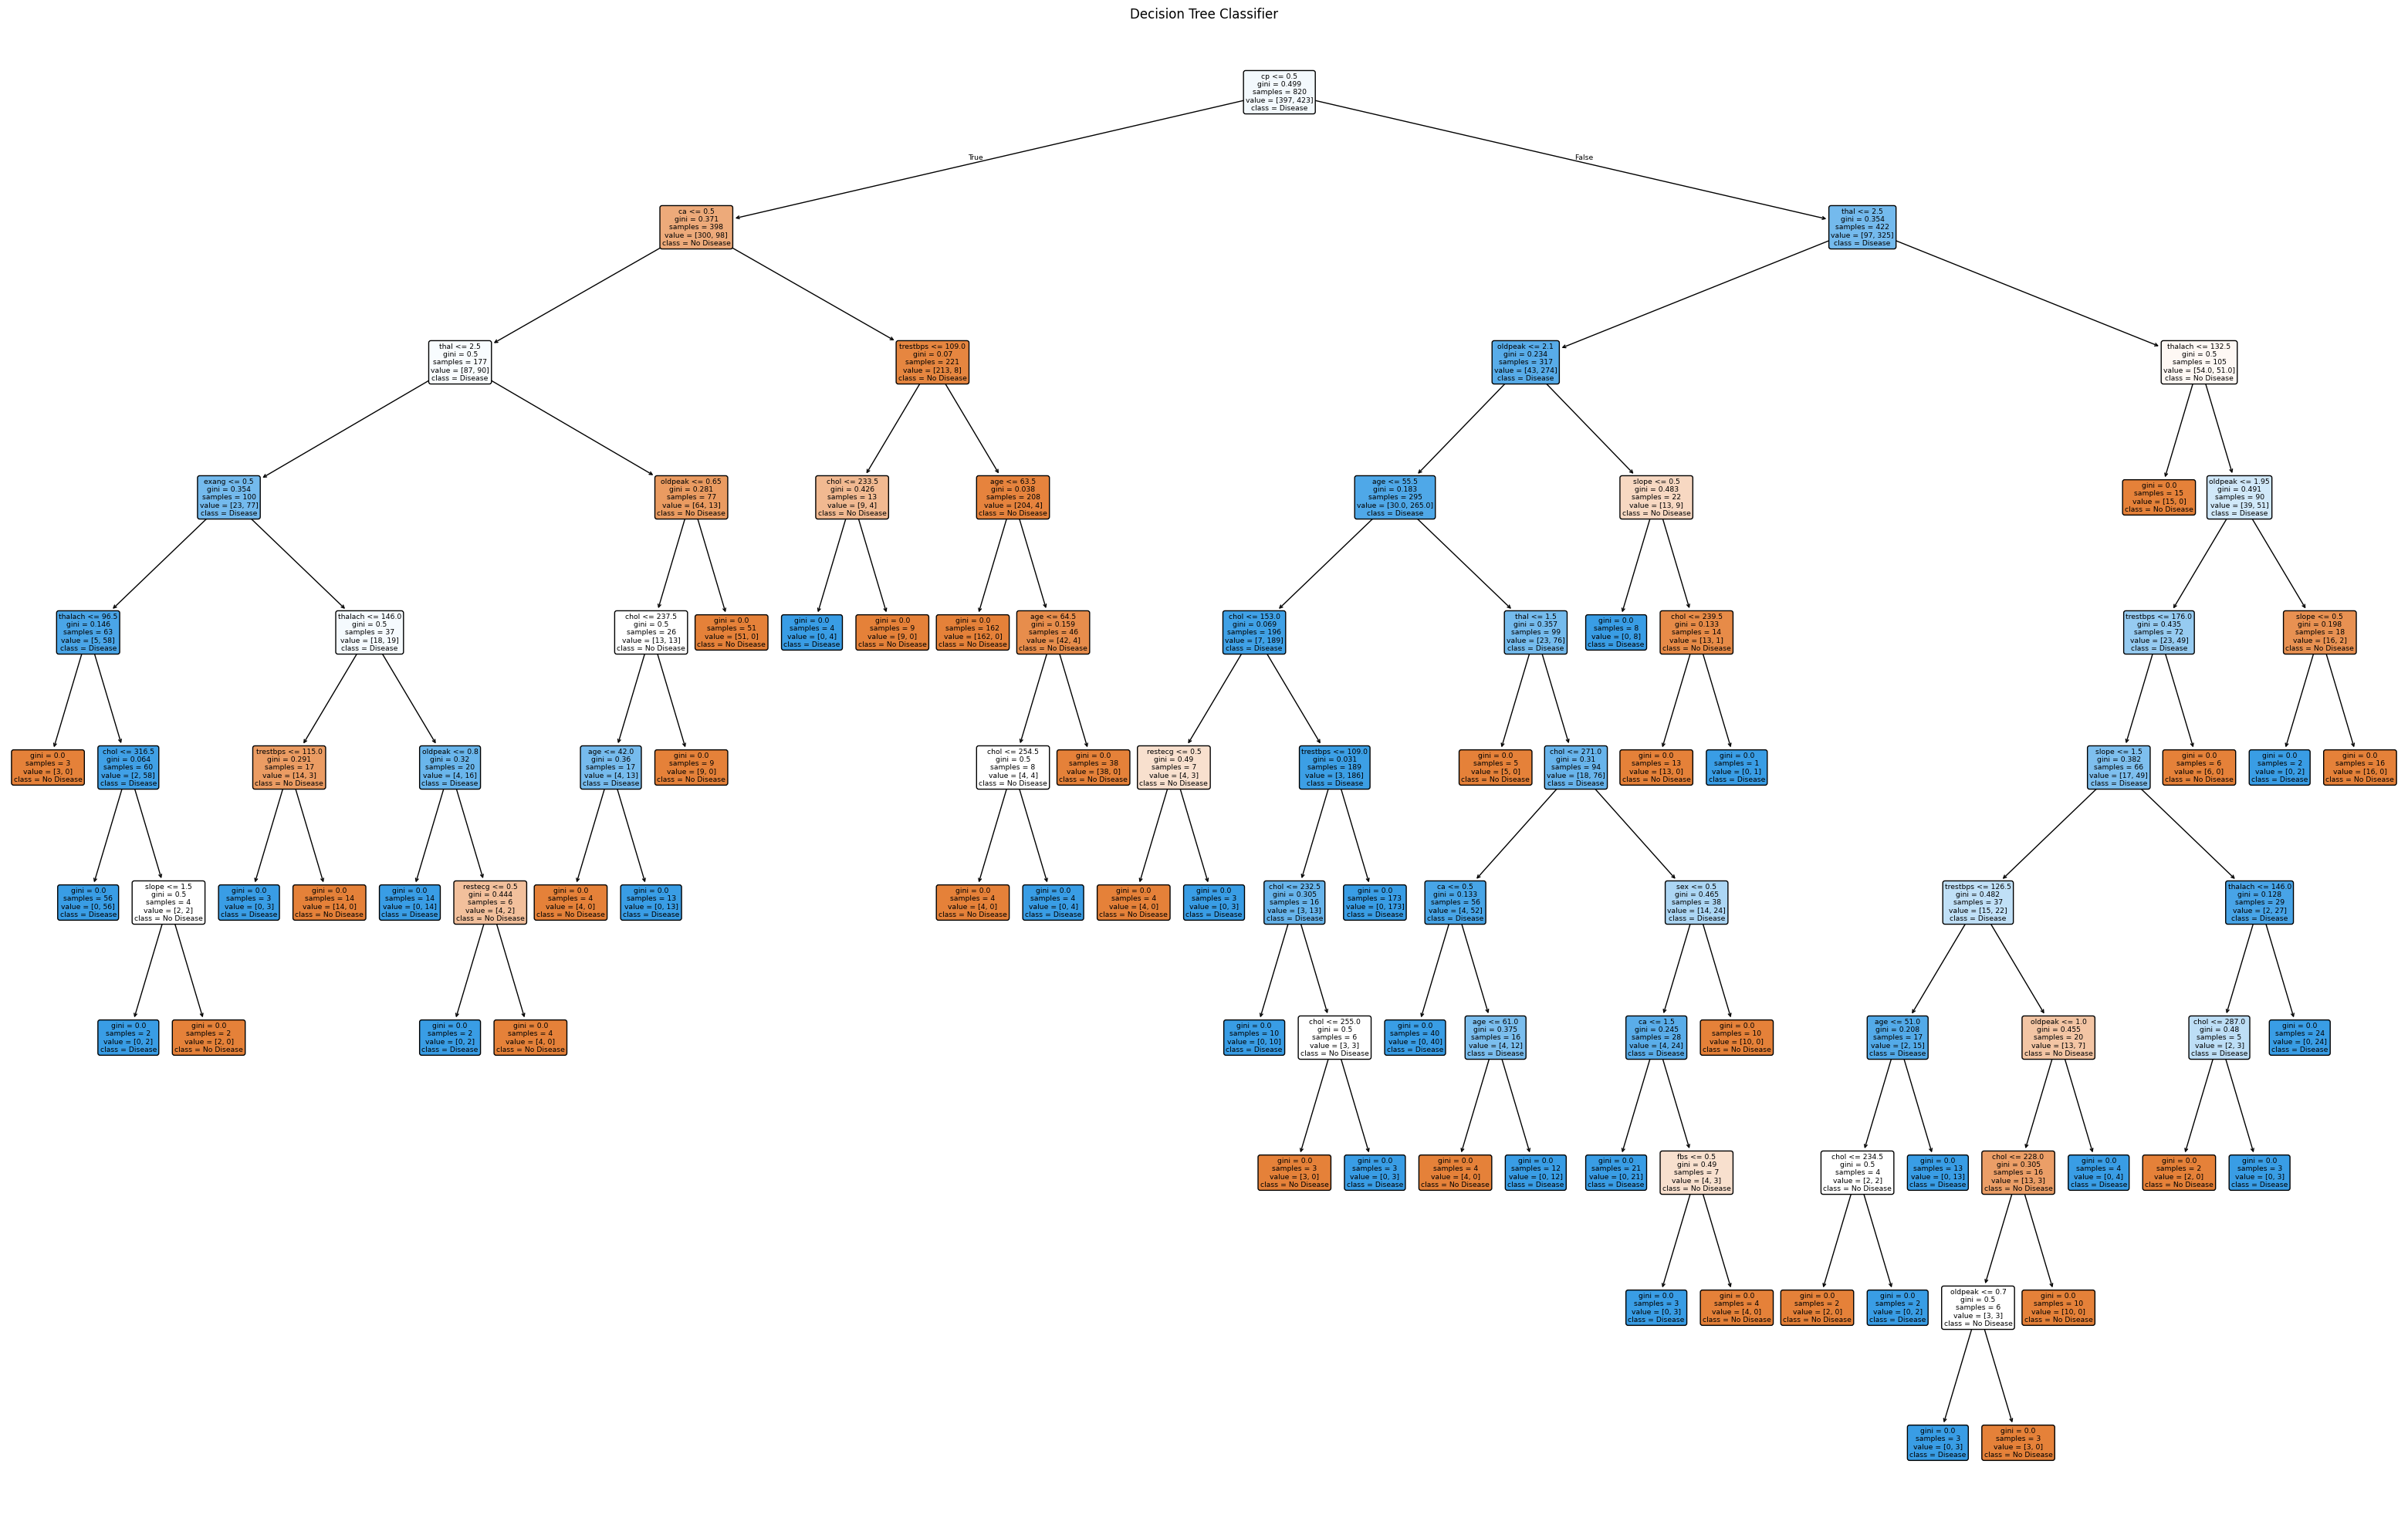

In [51]:
dt_classifier = dtc(random_state = 42)
dt_classifier.fit(X_train, y_train)

plt.figure(figsize = (40, 25))
pt(dt_classifier, feature_names = X.columns.tolist(), class_names = ['No Disease', 'Disease'], filled = True, rounded = True)
plt.title("Decision Tree Classifier")
plt.show()

#Analysing Overfitting and Controlling Tree Depth

Training Accuracy: 1.0
Test Accuracy: 0.99

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Decision Tree Confusion Matrix:
[[102   0]
 [  3 100]]

Training Accuracy (Controlled Depth): 0.85
Test Accuracy (Controlled Depth): 0.78

Decision Tree (Controlled Depth) Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205

Decision Tree (Controlled Depth) Confusion Matrix:
[[69 33]
 [12 91]]


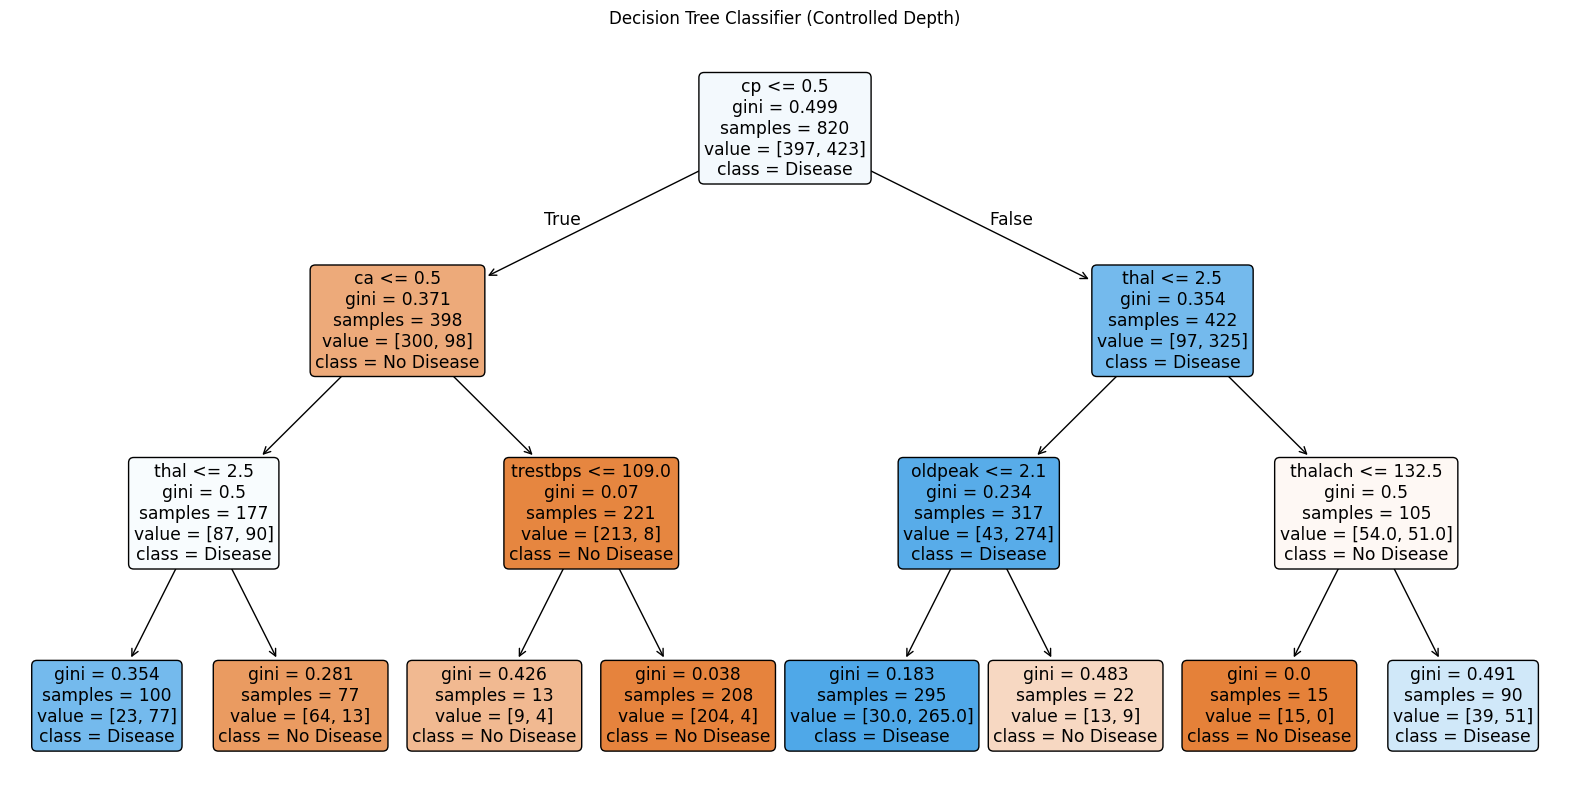

In [46]:
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_acc = acc(y_train, y_train_pred)
test_acc = acc(y_test, y_test_pred)

print("Training Accuracy:",round(train_acc, 2))
print("Test Accuracy:",round(test_acc, 2))
print("\nDecision Tree Classification Report:")
print(cr(y_test, y_test_pred))
print("Decision Tree Confusion Matrix:")
print(cm(y_test, y_test_pred))

dt_classifier_controlled = dtc(max_depth = 3, random_state = 42)
dt_classifier_controlled.fit(X_train, y_train)

y_train_pred_controlled = dt_classifier_controlled.predict(X_train)
y_test_pred_controlled = dt_classifier_controlled.predict(X_test)

train_acc_controlled = acc(y_train, y_train_pred_controlled)
test_acc_controlled = acc(y_test, y_test_pred_controlled)

print("\nTraining Accuracy (Controlled Depth):", round(train_acc_controlled, 2))
print("Test Accuracy (Controlled Depth):", round(test_acc_controlled, 2))
print("\nDecision Tree (Controlled Depth) Classification Report:")
print(cr(y_test, y_test_pred_controlled))
print("Decision Tree (Controlled Depth) Confusion Matrix:")
print(cm(y_test, y_test_pred_controlled))

plt.figure(figsize = (20, 10))
pt(dt_classifier_controlled, feature_names = X.columns.tolist(), class_names = ['No Disease', 'Disease'], filled = True, rounded = True)
plt.title("Decision Tree Classifier (Controlled Depth)")
plt.show()

#Training a Random Forest and Comparing Accuracy

In [50]:
rf_classifier = rfc(n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train, y_train)

y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

train_acc_rf = acc(y_train, y_train_pred_rf)
test_acc_rf = acc(y_test, y_test_pred_rf)

print("Random Forest Training Accuracy:", round(train_acc_rf, 2))
print("Random Forest Test Accuracy:", round(test_acc_rf, 2))
print("\nRandom Forest Classification Report:")
print(cr(y_test, y_test_pred_rf))
print("Random Forest Confusion Matrix:")
print(cm(y_test, y_test_pred_rf))

print("\nDecision Tree Training Accuracy:", round(train_acc, 2))
print("Decision Tree Test Accuracy:", round(test_acc, 2))
print("Decision Tree (Controlled Depth) Training Accuracy:", round(train_acc_controlled, 2))
print("Decision Tree (Controlled Depth) Test Accuracy:", round(test_acc_controlled, 2))

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.99

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Confusion Matrix:
[[102   0]
 [  3 100]]

Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.99
Decision Tree (Controlled Depth) Training Accuracy: 0.85
Decision Tree (Controlled Depth) Test Accuracy: 0.78


#Interpreting Feature Importance

Random Forest Feature Importances:
cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


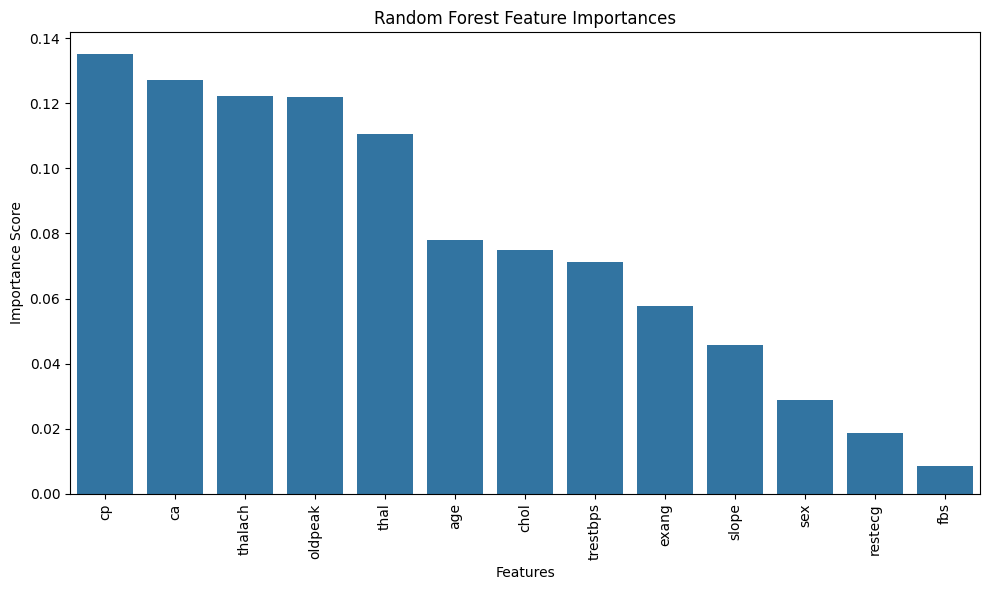

In [48]:
feature_importances = rf_classifier.feature_importances_
feature_importance_series = pd.Series(feature_importances, index = X.columns)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Random Forest Feature Importances:")
print(sorted_feature_importances)

plt.figure(figsize = (10, 6))
sns.barplot(x = sorted_feature_importances.index, y = sorted_feature_importances.values)
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

#Evaluating Through Cross-Validation

In [49]:
dt_cv_scores = cvs(dt_classifier, X, y, cv = 5)
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Decision Tree Mean Cross-Validation Accuracy:", round(np.mean(dt_cv_scores), 2))

dt_controlled_cv_scores = cvs(dt_classifier_controlled, X, y, cv = 5)
print("\nDecision Tree (Controlled Depth) Cross-Validation Scores:", dt_controlled_cv_scores)
print("Decision Tree (Controlled Depth) Mean Cross-Validation Accuracy:", round(np.mean(dt_controlled_cv_scores), 2))

rf_cv_scores = cvs(rf_classifier, X, y, cv = 5)
print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean Cross-Validation Accuracy:", round(np.mean(rf_cv_scores), 2))

Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
Decision Tree Mean Cross-Validation Accuracy: 1.0

Decision Tree (Controlled Depth) Cross-Validation Scores: [0.85365854 0.84878049 0.82926829 0.82439024 0.79512195]
Decision Tree (Controlled Depth) Mean Cross-Validation Accuracy: 0.83

Random Forest Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Random Forest Mean Cross-Validation Accuracy: 1.0
